# YEAR 2022
The library developed to simplify this notebook is available at https://github.com/satelliteprogrammer/budget
## Income

In [1]:
from salaries import *

person1 = Income(2489.67, 12, [0.1 * 2300 * 14 / 2]*2, (22 * 11 * 7.63))
person2 = Income(1967, 12, [0.1 * 1850 * 14 / 2]*2, (22 * 11 * 7.63))
both = Income(2489.67+1967, 12, [0.1 * (2300 + 1850) * 14 / 2]*2, (2 * 22 * 11 * 7.63), 2)

print(f"Gross income 1: {person1.gross()}€ and 2: {person2.gross()}€")

if (singles := person1.net() + person2.net()) > (coupled := both.net()):
    income = singles
    print("Best tax strategy is separated")
else:
    income = coupled
    print("Best tax strategy is coupled")
print(f"After tax income is {income}€")

Gross income 1: 33096.04€ and 2: 26194.0€
Best tax strategy is coupled
After tax income is 43694.11€


## Fixed Expenses

In [2]:
rent = 700 * 12
commute = 1400
utilities = 2000
health = 300
groceries = 4500
cleaning = 2625
fitness = 720
fixed = rent + commute + utilities + health + groceries + cleaning + fitness
print(f"{fixed}€")

19945€


## Variable Expenses

In [3]:
eatingout = 3000
car = 900
subscriptions = 79 + 89.90  # mail and grocery deliveries
variable = eatingout + car + subscriptions
print(f"{variable}€")

4068.9€


## Specific allocations

In [4]:
# we allocated each 75€ monthly for free spending
alloc1 = 900
alloc2 = 900

home = 300
entertainment = 300
education = 0
travel = 6000
specific = alloc1 + alloc2 + home + entertainment + education + travel
print(f"{specific}€")

8400€


## Giving

In [5]:
giving = round(0.02 * income, 2) # 2% of net income
print(f"{giving}€")

873.88€


## Monthly effort

Minimum monthly income 2937.90€
You've received less 266.25€ net income that calculated, so you should receive it back on the IRS return


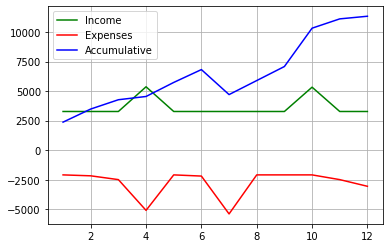

In [6]:
salaries = person1.netsalary() + person2.netsalary()
print(f"Minimum monthly income {salaries:.2f}€")

expenses = fixed + variable + specific + giving

# 0-indexed!
yincome = [salaries] * 12
yincome[3] += person1.netbonus()[0] + person2.netbonus()[0]
yincome[9] += person1.netbonus()[1] + person2.netbonus()[1]

yexpenses = [(fixed + eatingout + entertainment + alloc1 + alloc2) / 12] * 12

# car
yexpenses[2] += 400
yexpenses[5] += 100
yexpenses[10] += 400
# subscriptions
yexpenses[1] += 79
yexpenses[11] += 89.90

yexpenses[6] += home + education

# travel
yexpenses[3] += 3000
yexpenses[6] += 3000
for m in range(0, 12):
    if m == 3 and m == 6:
        yincome[m] += 2 * 11 * 7.63
    else:
        yincome[m] += 2 * 22 * 7.63

# giving
yexpenses[11] += giving


if income < sum(yincome):
    print(
        f"The sum of the net income throughout the year is {sum(yincome) - income:.2f}€ bigger than the initially calculated, so you'll have to repay the state on the IRS return or you've made a mistake"
    )
else:
    print(
        f"You've received less {income - sum(yincome):.2f}€ net income that calculated, so you should receive it back on the IRS return"
    )
assert sum(yexpenses) == expenses

graph = Graph(yincome, yexpenses)
graph.plot()


## Investing

In [7]:
remaining = income - expenses
print(f"Net income: {income}€, expenses: {expenses}€ leaving: {remaining:.2f}€")

Net income: 43694.11€, expenses: 33287.78€ leaving: 10406.33€


Below I've tested what was the maximum amount of money we could invest each month, while keeping above the 1k€ line for any unexpected expense.

A good starting point is to check what is the latest local minimum and divide that value for the number of months up to it. Afterwards I've increased my contributions while keeping above the 1k line. 

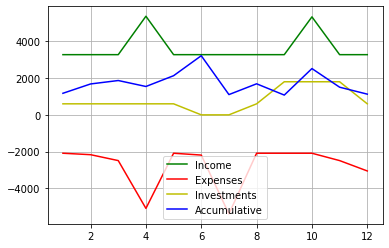

Invested 9600€


In [8]:
yinvested = [600] * 12
yinvested[5] -= 600
yinvested[6] -= 600
yinvested[8] += 1200
yinvested[9] += 1200
yinvested[10] += 1200
# yinvested[11] += 2000
graph = Graph(yincome, yexpenses, yinvested)
graph.plot()
print(f"Invested {sum(yinvested)}€")

## IRS return
⚠ TODO